In [5]:
import matplotlib.pyplot as plt
import astarVoxelClasses as AstarCl
import sys
import time

sys.path.insert(0,'/home/janik/Praktikum_medPhys/FirstSearchAlgos/code/')
import util as ut

In [10]:
def a_star_search(graph, ga_Pixel_range):
    
    start = (ga_Pixel_range[0],0)
    goal = ga_Pixel_range[1]
    
    frontier = AstarCl.PriorityQueue()
    frontier.put(start, 0)
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0
    
    while not frontier.empty():
        current = frontier.get()
        #print('current',current)
        if current[0] == goal:
            break
        
        for next_point in graph.GetNeighbours(current):
            new_cost = cost_so_far[current] + graph.cost(current, next_point)
            if next_point not in cost_so_far or new_cost < cost_so_far[next_point]:
                cost_so_far[next_point] = new_cost
                
                priority = new_cost + graph.heuristic(next_point)
                
                frontier.put(next_point, priority)
                came_from[next_point] = current
    
    print(current)
    return came_from, current

In [87]:
import imp

In [112]:
imp.reload(ut)

<module 'util' from '/home/janik/Praktikum_medPhys/FirstSearchAlgos/code/util.py'>

In [121]:
go = time.time()


ga_start = 0
ga_stop = 179


pathToOARs = '../../Test-2/plans/plan-1/gt-maps/track-1-map.txt'
pathToColl = '../../Test-2/setups/setup-1/collision-map.txt'
pathToCTrestr = '../../Test-2/setups/setup-1/ctRestriction-map.txt'

collMap = ut.load3DColorwash(pathToColl,setOneToInfty=False)[3]
cTrestrMap = ut.load3DColorwash(pathToCTrestr,setOneToInfty=False)[3]

dim, ga, ta, oARmap = ut.load3DColorwash(pathToOARs)
print(time.time()-go)
go = time.time()

GT = AstarCl.GT_map(oARmap,collMap,cTrestrMap,gradient=1,start=ga_start,end=ga_stop)
print(time.time()-go)
go = time.time()

came_from, last_point = a_star_search(GT, ga_Pixel_range=[ga_start,ga_stop])
print(time.time()-go)
go = time.time()

path = AstarCl.reconstruct_path(came_from=came_from, start=(ga_start,0),goal=last_point)

print(time.time()-go)

0.05493497848510742
0.0003006458282470703
(179, 12)
0.7618720531463623
0.0004725456237792969


In [16]:
import plotting as pl

In [106]:


pl.FlooadPlot(pic=oARmap,flood_level=0.3)

#pl.PlotTrack(path)
plt.show()

TypeError: ufunc 'minimum' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys

sys.path.insert(0,'/home/janik/Praktikum_medPhys/FirstSearchAlgos/code/')
import util as ut

In [2]:
class GT_map :
    def __init__(self, color_map,collision_map, CT_map, gradient=1,start=0,end=180,seeTheFuture=3) :
        self.color = color_map
        self.collision = collision_map
        self.ct = CT_map
        self.grad = gradient
        self.start_ga_Pixel = start
        self.end_ga_Pixel = end
        self.future = seeTheFuture
        
        self.tableMaxPixel, self.gantryMaxPixel = np.shape(self.color)
        
        
    def GetNeighbours (self, point) :
        """
        params:
            point      - is of type tuple. represents the coordinates (x,y) in pixel
                         units, i.e. in terms of the dimension of the color map
        returns :
            neighbours - is a list of tuples. Each list element is a tuple (x,y) of
                         points being the nrighbours of the input point
        """

        x = point[0]
        y = point[1]
        
        
        if (x == self.start_ga_Pixel) :
            neighbours = []
            for t in range(self.tableMaxPixel) :
                neighbours.append((x+1,t))
        else :
            #go to right
            neighbours = [(x+1,y)]
            for g in range(self.grad) :
                neighbours.append((x+1,y+(1+g)))
                neighbours.append((x+1,y-(1+g)))

        forbidden = []
        for n in neighbours :
            if (n[0]<0 or n[0]>self.gantryMaxPixel-1 or n[1]<0 or n[1]>self.tableMaxPixel-1
               or self.collision[n[::-1]] != 0. or self.ct[n[::-1]] != 0.) :
                forbidden.append(n)
            
        for f in forbidden :
            neighbours.remove(f)

        return neighbours
    
    def cost (self, current_point, next_point) :
        return self.color[next_point[::-1]]
    
    def heuristic(self,next_point) :
        x = next_point[0]
        y = next_point[1]
        
        return np.sum(self.color[y][x:x+self.future])
        

In [3]:
pathToOARs = '../../Test-2/plans/plan-1/gt-maps/track-1-map.txt'
pathToColl = '../../Test-2/setups/setup-1/collision-map.txt'
pathToCTrestr = '../../Test-2/setups/setup-1/ctRestriction-map.txt'

collMap = ut.load3DColorwash(pathToColl,setOneToInfty=True)[3]
cTrestrMap = ut.load3DColorwash(pathToCTrestr,setOneToInfty=True)[3]

dim, ga, ta, oARmap = ut.load3DColorwash(pathToOARs)

In [17]:
import time

In [4]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self):
        return len(self.elements) == 0
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

In [84]:
def reconstruct_path(came_from, start, goal):
    current = goal
    path = []
    while current != start:
        path.append(current)
        current = came_from[current]
    
    #append start point being one to the left 
    path.append((path[-1][0]-1,path[-1][1])) 
    
    path.reverse() 
    return path

In [85]:
def heuristic(a, b):
    (x1, y1) = a
    (x2, y2) = b
    #return abs(x1 - x2) + abs(y1 - y2)
    return 0.


def a_star_search(graph, ga_Pixel_range):
    
    start = (ga_Pixel_range[0],0)
    goal = ga_Pixel_range[1]
    
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0
    
    while not frontier.empty():
        current = frontier.get()
        #print('current',current)
        if current[0] == goal:
            break
        
        for next_point in graph.GetNeighbours(current):
            new_cost = cost_so_far[current] + graph.cost(current, next_point)
            if next_point not in cost_so_far or new_cost < cost_so_far[next_point]:
                cost_so_far[next_point] = new_cost
                
                #priority = new_cost + heuristic(goal, next_point)
                priority = new_cost + graph.heuristic(next_point)
                
                frontier.put(next_point, priority)
                came_from[next_point] = current
    
    print(current)
    return came_from, current


In [118]:
ga_start = 0
ga_stop = 179

In [119]:
go = time.time()
GT = GT_map(oARmap,collMap,cTrestrMap,gradient=5,start=ga_start,end=ga_stop)

came_from, last_point = a_star_search(GT, ga_Pixel_range=[ga_start,ga_stop])

print(time.time()-go)

start pixel
(179, 28)
1.8950366973876953


In [120]:
print(last_point)

(179, 28)


In [121]:
path = reconstruct_path(came_from=came_from, start=(ga_start,0),goal=last_point)

In [122]:
import plotting as pl

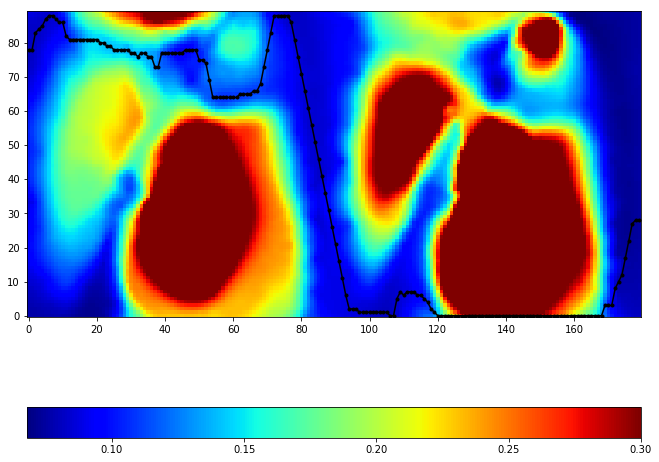

In [123]:
#pl.QuickPlot(pic=oARmap+collMap/10.+cTrestrMap/10.)

pl.FlooadPlot(pic=oARmap,flood_level=0.3)

pl.PlotTrack(path)
plt.show()